In [576]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [577]:
%autoreload 2

In [578]:
import pandas as pd
import networkx as nx
from uuid import uuid4
from pprint import pprint

In [579]:
bot = pd.read_csv('01_books_of_titans_clean.csv', index_col=[0])
bot = bot.fillna('')
bot.head(1)

,book,author,title,subtitle,author_1_given_name,author_1_middle_name,author_1_surname,author_2_given_name,author_2_middle_name,author_2_surname
uuid,,,,,,,,,,
bot:d56c28d9-9fed-4a6e-960b-e4c2a75117dd,10% Happier,['Dan Harris'],10 happier,,dan,,harris,,,


In [580]:
aud = pd.read_csv('01_audiobooks_clean.csv', index_col=[0])
aud = aud.fillna('')
aud.head(1)

,book,author,title,subtitle,author_1_given_name,author_1_middle_name,author_1_surname,author_2_given_name,author_2_middle_name,author_2_surname
uuid,,,,,,,,,,
aud:e82e5be9-de17-402d-948d-1d3dcfd03577,12 Rules for Life: An Antidote to Chaos,['Jordan B. Peterson'],12 rules for life,an antidote to chaos,jordan,b,peterson,,,


In [581]:
features = pd.read_csv('03_comparison_results.csv', index_col=[0,1])

In [582]:
# Better matching, with weighting on the title and first author.
def score_book_matches(row):
    """ Intelligent(ish) scoring.
    """
    author_1_name_score = (
        (row['author_1_given_name'] + row['author_1_middle_name'] + row['author_1_surname'])
    )
    if author_1_name_score >= 2.0:
        # Author 1 is basically the same. Discount it, to maximise the differences of title.
        return (row['title'] + row['subtitle']) * 4
    else:
        # Just dumb sum again.
        return row.sum()

features['match_score'] = features.apply(score_book_matches, axis=1)

In [583]:
features.sort_values(by='match_score', ascending=False, inplace=True)
features.head(5)

,,title,subtitle,author_1_given_name,author_1_middle_name,author_1_surname,author_2_given_name,author_2_middle_name,author_2_surname,match_score
uuid_1,uuid_2,,,,,,,,,
bot:13627bd4-2020-48b4-9ec7-27b7f6f0b865,aud:0592a82a-37f5-45ca-8768-9cf4cc37b38d,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0
bot:a181f013-b678-4ee7-aeeb-fff21bcd736a,aud:76fa2770-7258-447e-a35f-04cec877f6f7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0
bot:d552e230-e5f6-40bd-be9c-4713d06898c2,aud:ad229fca-662c-451d-a019-410bd9b0f260,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0
bot:53aa2f59-998a-4d15-bc8d-f71b48394690,aud:701b7194-309f-4457-9d46-7472713672ac,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0
bot:ae1980ff-c68e-4d62-834d-c22fb2d5742f,aud:d09c4706-0afe-4415-8a8b-d3b649138ee9,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8.0


In [584]:
features.tail(5)

,,title,subtitle,author_1_given_name,author_1_middle_name,author_1_surname,author_2_given_name,author_2_middle_name,author_2_surname,match_score
uuid_1,uuid_2,,,,,,,,,
bot:4187aac7-68a4-42e4-b2bd-f093c64a8865,aud:ae6b776a-58d8-4520-a3cd-40d8bb9183a4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
bot:5d91e90f-1fb5-4b27-ac1b-733b8c71ec16,aud:de4dd712-0da1-460a-97be-22d789b0d319,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
bot:ab11aaf1-ed48-4001-bda9-53575eb8b4fa,aud:ea0da6d0-c7b9-489d-8b57-07c9046731e5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
bot:acb28f8c-599a-42ea-a8ed-668cd52e7ffc,aud:3b96c30b-d9b6-4330-a0e2-7e0bd5feffb1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bot:cfc1a535-c631-45ce-be2a-f7c32f6e8686,aud:c4e0d595-7e4f-4e41-b126-48bddf1028a8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


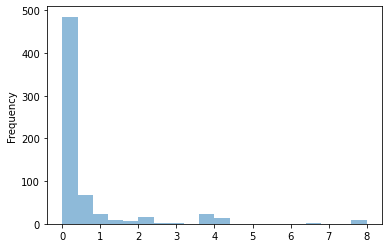

In [585]:
ax = features['match_score'].plot.hist(bins=20, alpha=0.5)

In [587]:
borderline = features.loc[
    (features['match_score'] > 2)
    & (features['match_score'] < 3)
]

In [588]:
for left, right in borderline.head(10).index.values:
    match = (
        tuple(bot[['book', 'author']].loc[left]),
        tuple(aud[['book', 'author']].loc[right]),
        borderline.loc[(left, right)]['match_score']
    )
    pprint(match)

(('The Tipping Point', "['Malcolm Gladwell']"),
 ('The Tipping Point: How Little Things Can Make a Big Difference',
  "['Malcolm Gladwell']"),
 2.9999999999999996)
(('Crush It', "['Gary Vaynerchuk']"),
 ('Crushing It!: How Great Entrepreneurs Build Their Business and Influenceand '
  'How You Can, Too',
  "['Gary Vaynerchuk']"),
 2.753805774118335)
(('Emotional Intelligence', "['Daniel Goleman']"),
 ('Emotional Intelligence', "['Daniel Coleman']"),
 2.6668843419582333)
(('What the Dog Saw: And Other Adventures', "['Malcolm Gladwell']"),
 ('What the Dog Saw and Other Adventures', "['Malcolm Gladwell']"),
 2.650863432676542)
(('Blink: The Power of Thinking Without Thinking', "['Malcolm Gladwell']"),
 ('The Tipping Point: How Little Things Can Make a Big Difference',
  "['Malcolm Gladwell']"),
 2.1022089627821714)
(('David and Goliath: Underdogs, Misfits, and the Art of Battling Giants',
  "['Malcolm Gladwell']"),
 ('The Tipping Point: How Little Things Can Make a Big Difference',
  "['Ma

In [589]:
# Assign Matches
matches = features.loc[features['match_score'] > 2.6]

In [590]:
print(f"{len(matches)} matches from {len(features)} comparisons.")

49 matches from 652 comparisons.


In [591]:
# Cluster Matches

In [592]:
G = nx.Graph()
# Add nodes
G.add_nodes_from(
    set(matches.index.get_level_values(0) + matches.index.get_level_values(1))
)
# Add edges
G.add_edges_from(matches.index.values)

In [593]:
comparison_clusters = []
for cluster in sorted(nx.connected_components(G), key=len, reverse=True):
    cluster_id = f"cluster:{uuid4()}"
    for record_id in cluster:
        comparison_clusters.append(
            (record_id, cluster_id, len(cluster))
        )
clusters = pd.DataFrame(comparison_clusters, columns=['record_id', 'cluster_id', 'cluster_size'])
clusters = clusters.set_index('record_id')
clusters.head()

,cluster_id,cluster_size
record_id,,
aud:179b919c-b103-4a04-8154-5003465d640c,cluster:099c1322-5bfc-42b4-922d-f18c93604f4f,3
bot:6e777631-f50f-4d67-975a-43869729bcc8,cluster:099c1322-5bfc-42b4-922d-f18c93604f4f,3
bot:fca75f03-45ca-4c78-9a6a-e5a2c9d2a5df,cluster:099c1322-5bfc-42b4-922d-f18c93604f4f,3
bot:13627bd4-2020-48b4-9ec7-27b7f6f0b865,cluster:20eaa9bd-818f-47f3-9e03-0e9ac0bff607,2
aud:0592a82a-37f5-45ca-8768-9cf4cc37b38d,cluster:20eaa9bd-818f-47f3-9e03-0e9ac0bff607,2


In [594]:
books = pd.concat(
    [
        bot.loc[set(matches.index.get_level_values(0))],
        aud.loc[set(matches.index.get_level_values(1))]
    ]
)
books.head(1)

,book,author,title,subtitle,author_1_given_name,author_1_middle_name,author_1_surname,author_2_given_name,author_2_middle_name,author_2_surname
uuid,,,,,,,,,,
bot:2180a48f-e772-4ca9-abe2-6d3c837637ac,Work Rules!,['Laszlo Bock'],work rules,,laszlo,,bock,,,


In [595]:
books = pd.merge(books, clusters, how='left', left_index=True, right_index=True).sort_values(by='cluster_size', ascending=False)

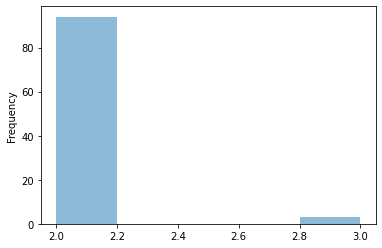

In [596]:
ax = books['cluster_size'].plot.hist(bins=5, alpha=0.5)

In [597]:
books.groupby('cluster_id').get_group(books.iloc[0]['cluster_id']).sort_values(by='title')

,book,author,title,subtitle,author_1_given_name,author_1_middle_name,author_1_surname,author_2_given_name,author_2_middle_name,author_2_surname,cluster_id,cluster_size
uuid,,,,,,,,,,,,
aud:179b919c-b103-4a04-8154-5003465d640c,Predictably Irrational: The Hidden Forces That...,['Dan Ariely'],predictably irrational,the hidden forces that shape our decisions,dan,,ariely,,,,cluster:099c1322-5bfc-42b4-922d-f18c93604f4f,3
bot:6e777631-f50f-4d67-975a-43869729bcc8,Predictably Irrational,['Dan Ariely'],predictably irrational,,dan,,ariely,,,,cluster:099c1322-5bfc-42b4-922d-f18c93604f4f,3
bot:fca75f03-45ca-4c78-9a6a-e5a2c9d2a5df,"Predictably Irrational, Revised and Expanded E...",['Dan Ariely'],predictably irrational revised and expanded ed...,the hidden forces that shape our decisions,dan,,ariely,,,,cluster:099c1322-5bfc-42b4-922d-f18c93604f4f,3
